SHASHANK VENKAT 20BCE2961

WITH LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("dataset.csv")

In [4]:
data

,midterm_exam,final_exam
0,72,84
1,50,63
2,81,77
3,74,78
4,94,90
5,86,75
6,59,49
7,83,79
8,65,77
9,33,52


In [5]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [6]:
X


,midterm_exam
0,72
1,50
2,81
3,74
4,94
5,86
6,59
7,83
8,65
9,33


In [7]:
Y

0    84
1    63
2    77
3    78
4    90
5    75
6    49
7    79
8    77
9    52
Name: final_exam, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.3)

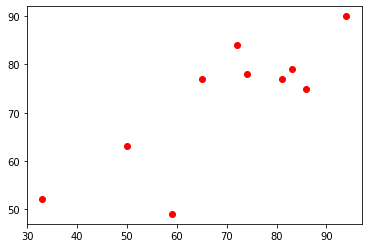

In [12]:
plt.scatter(X,Y,c='red')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

In [15]:
model.fit(X_train,Y_train)

LinearRegression()

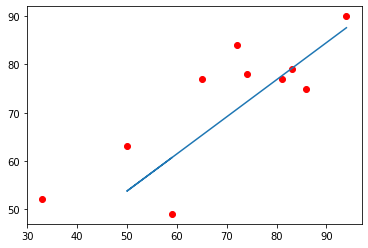

In [21]:
viz=plt
viz.scatter(X,Y,c='red')
viz.plot(X_train,model.predict(X_train))

In [36]:
m=float(model.coef_)

In [37]:
b=model.intercept_

In [26]:
y_pred=model.predict(X_test)

In [27]:
y_pred

array([65.27945713, 40.63294263, 70.67088217, 72.21128933, 79.14312153,
       77.60271437, 81.45373226])

In [28]:
Y_test

8    77
9    52
0    84
3    78
7    79
2    77
5    75
Name: final_exam, dtype: int64

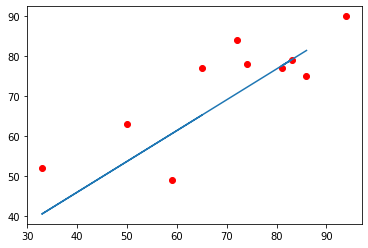

In [29]:
viz=plt
viz.scatter(X,Y,c='red')
viz.plot(X_test,y_pred)

In [31]:
result=model.predict([[86]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
print("Value predicted for 86 is : ",float(result))

Value predicted for 86 is :  81.45373226403454


In [39]:
print("Equation of regression line is : y="+str(m)+"*x+"+str(b))

Equation of regression line is : y=0.7702035780382479*x+15.216224552745217


In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,Y_test)

74.25572577673829

WITHOUT LIBRARY


In [55]:

import pandas as pd
from math import pow


def get_headers(dataframe):
    return dataframe.columns.values


def cal_mean(readings):
    readings_total = sum(readings)
    number_of_readings = len(readings)
    mean = readings_total / float(number_of_readings)
    return mean


def cal_variance(readings):
    readings_mean = cal_mean(readings)
    mean_difference_squared_readings = [pow((reading - readings_mean), 2) for reading in readings]
    variance = sum(mean_difference_squared_readings)
    return variance / float(len(readings) - 1)


def cal_covariance(readings_1, readings_2):
    readings_1_mean = cal_mean(readings_1)
    readings_2_mean = cal_mean(readings_2)
    readings_size = len(readings_1)
    covariance = 0.0
    for i in range(0, readings_size):
        covariance += (readings_1[i] - readings_1_mean) * (readings_2[i] - readings_2_mean)
    return covariance / float(readings_size - 1)


def cal_simple_linear_regression_coefficients(x_readings, y_readings):
    b1 = cal_covariance(x_readings, y_readings) / float(cal_variance(x_readings))
    b0 = cal_mean(y_readings) - (b1 * cal_mean(x_readings))
    return b0, b1


def predict_target_value(x, b0, b1):

    return b0 + b1 * x


def cal_rmse(actual_readings, predicted_readings):

    square_error_total = 0.0
    total_readings = len(actual_readings)
    for i in range(0, total_readings):
        error = predicted_readings[i] - actual_readings[i]
        square_error_total += pow(error, 2)
    rmse = square_error_total / float(total_readings)
    return rmse


def simple_linear_regression(dataset,alpha):
    
    dataset_headers = get_headers(dataset)
    print ("Dataset Headers :: ", dataset_headers)
    
    Y_mean = cal_mean(dataset[dataset_headers[0]])
    X_mean = cal_mean(dataset[dataset_headers[1]])
    Y_variance = cal_variance(dataset[dataset_headers[0]])
    X_variance = cal_variance(dataset[dataset_headers[1]])
    covariance_of_X_and_Y = dataset.cov()[dataset_headers[0]][dataset_headers[1]]
    w1 = covariance_of_X_and_Y / float(Y_variance)
    w0 = X_mean - (w1 * Y_mean)
    res=float(w0)+(float(w1)*alpha)
    mse=(pow.sqrt((Y_test-y_pred)**2))/len(Y_test)
    print("Predicted Value for 86 is :",res)
    print("Mean Squared Error is : ",mse)

if __name__ == "__main__":

    input_path = "dataset.csv"
    data = pd.read_csv(input_path)
    alpha=86
    simple_linear_regression(data,alpha)

Dataset Headers ::  ['midterm_exam' 'final_exam']
Predicted Value for 86 is : 82.12421059520304
Mean Squared Error is :  74.25572577673829
